## Portfolio Optimization

* Portfolio optimization models look for the optimal way to make investments. 
  * Usually investors expect either a maximum return for a given level of risk or a given return for a minimum risk so these models are typically based on two criteria: **maximization of the expected return and/or minimization of the risk**.

### Some Notation

* expected return: 
$$\mathbb{E}(R_{p}) = \sum _{i}w_{i} \mathbb{E}(R_{i}) = \mathbf{w}\cdot \mathbf{R} = \mathbf{w}^T \mathbf{R}=
\begin{bmatrix}
w_1 \\ 
w_2 \\ 
\vdots \\
w_n
\end{bmatrix}
\begin{bmatrix}
\mathbb{E}(R_1) & \mathbb{E}(R_2) & \cdots & \mathbb{E}(R_n)
\end{bmatrix}$$
(with $\sum_{i}w_i = 1$ and $0 \le w_i \le 1$);
* portfolio return variance:
  $$ \sigma _{p}^{2} = \sum _{i}\sum _{j}w_{i}w_{j}\sigma _{ij} = \mathbf{w}^T\Sigma\mathbf{w} =
\begin{bmatrix}
w_1 \\ 
w_2 \\ 
\vdots \\
w_n
\end{bmatrix}
\begin{bmatrix}
\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\
\vdots & & \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn} \\
\end{bmatrix}
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix} = 
\begin{bmatrix}
\sigma_{11} *w_1 + \sigma_{12} *w_2 + \cdots + \sigma_{1n}*w_n \\
\sigma_{21} *w_1 + \sigma_{22} *w_2  +\cdots + \sigma_{2n}*w_n \\
\vdots \\
\sigma_{n1} *w_1 + \sigma_{n2}*w_2 + \cdots + \sigma_{nn}*w_n \\
\end{bmatrix}
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix}\\[20 pt]
$$ 
  where
  $\Sigma = \sigma _{ij}=\sigma _{i}\sigma _{j}\rho _{ij}$ is the 
  covariance, $\rho_{ij}$ is the correlation coefficient;
* portfolio standard deviation:
  $$ \sigma _{p}= \sqrt{\sigma _{p}^{2}}$$

* Throughout this lesson we will use market data stored in [portfolio_data.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/portfolio_data.csv).


In [ ]:
# load the file
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/portfolio_data.csv", index_col="date")
print (df.head())

                 AAPL     AMZN     FB    GOOG       NFLX
date                                                    
2014-03-27  71.865678  338.470  60.97  558.46  52.025714
2014-03-28  71.785450  338.290  60.01  559.99  51.267143
2014-03-31  71.769404  336.365  60.24  556.97  50.290000
2014-04-01  72.425937  342.990  62.62  567.16  52.098571
2014-04-02  72.546280  341.960  62.72  567.00  51.840000


<img src="https://drive.google.com/uc?id=1XUa_cJF7C-I9ojge_bD3bfUx1fjHgKm2">

In [ ]:
# returns daily and annualized

daily_returns = df.pct_change()
returns = daily_returns.mean()*252
print (returns)

AAPL    0.239188
AMZN    0.415127
FB      0.263797
GOOG    0.172818
NFLX    0.528046
dtype: float64


In [ ]:
# covariance
covariance = daily_returns.cov()*252
print (covariance)

          AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.051902  0.025037  0.025737  0.022454  0.027760
AMZN  0.025037  0.085839  0.041025  0.039501  0.048412
FB    0.025737  0.041025  0.069550  0.036127  0.044528
GOOG  0.022454  0.039501  0.036127  0.051797  0.040390
NFLX  0.027760  0.048412  0.044528  0.040390  0.178298


* **A portfolio is characterized by the asset weights**:
  * look at their distribution in terms of return and volatility;
  * no attempt of any optimization whatsoever has been made here;
  * no short sales considered:
    * a portfolio is short in those stocks with negative weights.

In [ ]:
# asset weights simulation
from scipy.stats import uniform
import numpy as np

n_assets = 5
R = []
Sigma = []

np.random.seed(1)
for _ in range(10000):
  u = uniform.rvs(size=n_assets)
  w = u/u.sum()
  Sigma.append(w.T.dot(covariance.dot(w)))
  R.append(returns.dot(w))

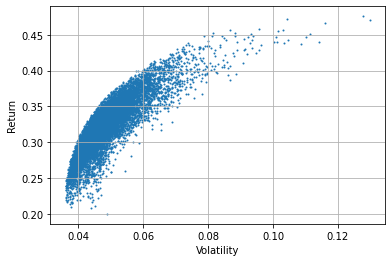

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Sigma, R, s=1)
plt.grid(True)
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.show()

### Modern Portfolio Theory (MPT)
* MPT model assumes an investor usually consider **expected return and variance in return**. Markowitz intuition was to estimate investment risk through portfolio variance  (i.e. since it measures the variability in realized return around the expected return). 
  * The latter characterizes not only the individual variability of the return on each investment, but also how each investment’s return tends to move with other investments. 

* **Portfolio weights $w_i$ should be chosen such that the portfolio has the minimum volatility (variance)**

$$\min\{\sigma_P^2\}= \underset{\mathbf{w}}{\min}\{\mathbf{w}^T\Sigma\mathbf{w}\}$$


In [ ]:
# markowitz
import numpy as np
from scipy.optimize import minimize

def sum_weights(w): 
    return np.sum(w) - 1

def risk(w, cov):
    return w.T.dot(cov.dot(w))

num_assets = 5
constraints = ({'type': 'eq', 'fun': sum_weights},) 
bounds = tuple((0, 1) for _ in range(num_assets))
weights = [1./num_assets for _ in range(num_assets)]

opts = minimize(risk, weights, args=(covariance,),
                bounds=bounds, constraints=constraints)
print (opts)

     fun: 0.0360702996376482
     jac: array([0.0723022 , 0.07233166, 0.0718961 , 0.0719931 , 0.07223676])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.44544148, 0.06252824, 0.12333118, 0.36621569, 0.00248342])


In [ ]:
# expected return

print ("Expected portfolio return: {:.3f}".format(opts.x.dot(returns)))

Expected portfolio return: 0.230


* The model recommends about 44% of the portfolio be invested in AAPL, about 6% in AMZN, 12% in FB and so on...
* The expected return is about 23%, with a variance of about 0.036 (standard deviation of 0.19).

* We based the model simply on statistical data derived from daily returns. However it could be possible to use also information about its expected future performance.

### Efficient Frontier and Parametric Analysis
* There is no precise way for an investor to determine the “correct” trade off between risk and return
  * generally higher expected return has to be *paid* with higher risk. 

* **Interested in looking at the relative distribution of the two**. 
  * Draw the **efficient frontier** of return and risk; 
  * need to solve for the minimum variance portfolio over a range of values for the expected return.

In [ ]:
# efficient frontier

def efficient_frontier(w, asset_returns, target_return): 
    portfolio_return = asset_returns.dot(w) 
    return (portfolio_return - target_return)

results = []    
for t_return in np.arange(0.20, 0.45, 0.005):
    constraints = ({'type': 'eq', 'fun': sum_weights},
                   {'type': 'eq', 'fun': efficient_frontier, 
                    'args':(returns, t_return,)})
    weights = [1./num_assets for _ in range(num_assets)]
    opts = minimize(risk, weights, args=(covariance,),
                    bounds=bounds, constraints=constraints) 
    
    results.append((np.sqrt(opts.x.T.dot(covariance.dot(opts.x))),
                    returns.dot(opts.x))) 

<img src="https://drive.google.com/uc?id=1UYXawAY5x7tfa26332L1FWj0Jyimm-7a">

### Criticisms to Markowitz Model

* The tendency to produce extreme portfolios combining extreme shorts with extreme longs. As a result,portfolio managers generally do not trust these extreme weights. This problem is typically caused by
estimation errors in the mean return vector and covariance matrix;
* the portfolio weights tend to be extremely sensitive to very small changes in the expected returns. For example, even a small increase in the expected return of just one asset can dramatically alter the optimal composition of the entire portfolio;
* the presence of heavy tails in the return distributions can result in significant errors in covariance estimates as well.

### Portfolios with a Risk-Free Asset
* When one of the asset of the portfolio is risk free, then the efficient frontier has a particularly simple form: the *capital allocation line* (CAL). 

* The simplest example is a portfolio containing two assets: one risk-free with $\mathbb{E}[R_f] = 3\%$ (e.g. treasury bill) and one risky (e.g. a stock) with $\mathbb{E}[R_r] = 10\%$ and standard deviation $\sigma_r = 20\%$.
  * The question that needs to be answered for any individual investor is how much to invest in each of these assets ?

$$\mathbb{E}[R_p] = \mathbb{E}[R_f]\cdot w_f + \mathbb{E}[R_r] \cdot ( 1 − w_f )$$
where $w_f$ is the relative allocation to the risk-free asset.

$$\sigma_p = ( 1 − w_f ) \cdot \sigma_r$$

* If $w_f = 1$ the expected return would be 3% and the risk of the portfolio would be 0%. 
* If $w_f = 0$ would give an investor an expected return of 10% and a portfolio risk of 20%. 
* If $w_f=0.25$:

$$\mathbb{E}[R_p] = ( 3\% \cdot 25\% ) + ( 10\% \cdot 75\% ) = 0.75\% + 7.5\% = 8.25\%$$

$$\sigma_p = 75\%\cdot 20\% = 15\%$$

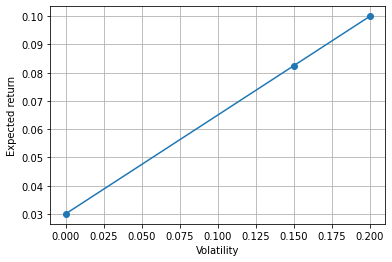

In [ ]:
from matplotlib import pyplot as plt
x = [0, 0.15, 0.20]
y = [0.03, 0.0825, 0.1]
plt.plot(x, y, marker='o')
plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.grid(True)
plt.show() 

* The slope of this line measures the trade off between risk and return: a higher slope means that investors receive a higher expected return in exchange for taking on more risk. 

In [ ]:
# CAL for the example
# last asset risk-free
num_assets = 6
    
def risk_with_rf(w, cov):
    return w[:-1].T.dot(cov.dot(w[:-1]))

def efficient_frontier_with_rf(w, asset_returns, target_return, 
                               risk_free): 
    portfolio_return = asset_returns.dot(w[:-1]) + risk_free*w[5] 
    return (portfolio_return - target_return)

rf_asset_return = 0.10
results_rf = []
bounds = [(0, 1) for asset in range(num_assets)]

for t_return in np.arange(0.10, 0.45, 0.01):
    constraints = ({'type': 'eq', 'fun': efficient_frontier_with_rf, 
                    "args":(returns, t_return, rf_asset_return)},
                    {'type': 'eq', 'fun': sum_weights})
    weights = [1./num_assets for _ in range(num_assets)]
    opts = minimize(risk_with_rf, weights, 
                    args=(covariance),
                    bounds=bounds, constraints=constraints)
    
    results_rf.append((np.sqrt(opts.x[:-1].T.dot(covariance.dot(opts.x[:-1]))), 
                     returns.dot(opts.x[:-1])+opts.x[5]*rf_asset_return))

In [ ]:
# CAL for the example
# last asset risk-free
num_assets = 6
returns_rf = np.append(returns.values, 0.10)
cov_rf = np.column_stack((covariance.values, np.array([0, 0, 0, 0, 0])))
cov_rf = np.row_stack((cov_rf, np.array([0, 0, 0, 0, 0, 0])))
print (cov_rf)

rf_asset_return = 0.10
results_rf = []
bounds = [(0, 1) for asset in range(num_assets)]

for t_return in np.arange(0.10, 0.45, 0.01):
    constraints = ({'type': 'eq', 'fun': efficient_frontier, 
                    "args":(returns_rf, t_return)},
                    {'type': 'eq', 'fun': sum_weights})
    weights = [1./num_assets for _ in range(num_assets)]
    opts = minimize(risk, weights, 
                    args=(cov_rf),
                    bounds=bounds, constraints=constraints)
    
    results_rf.append((np.sqrt(opts.x.T.dot(cov_rf.dot(opts.x))), returns_rf.dot(opts.x)))

[[0.05190222 0.02503721 0.02573699 0.02245413 0.02775968 0.        ]
 [0.02503721 0.08583929 0.04102487 0.03950122 0.04841167 0.        ]
 [0.02573699 0.04102487 0.06955025 0.03612685 0.04452847 0.        ]
 [0.02245413 0.03950122 0.03612685 0.05179662 0.04038995 0.        ]
 [0.02775968 0.04841167 0.04452847 0.04038995 0.17829826 0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


[4.22699552e-13 7.95484443e-03 1.58972329e-02 2.38547476e-02
 3.17633126e-02 3.97040513e-02 4.76448729e-02 5.55856783e-02
 6.35310010e-02 7.14701640e-02 7.94080591e-02 8.73488642e-02
 9.52914285e-02 1.03236948e-01 1.11173000e-01 1.19113010e-01
 1.27053227e-01 1.34995537e-01 1.42938801e-01 1.50885507e-01
 1.58825231e-01 1.66757938e-01 1.74698835e-01 1.82639562e-01
 1.90580144e-01 1.98520672e-01 2.06461450e-01 2.14402398e-01
 2.22343632e-01 2.30283718e-01 2.38225287e-01 2.46165449e-01
 2.54105891e-01 2.62053984e-01 2.70103753e-01]


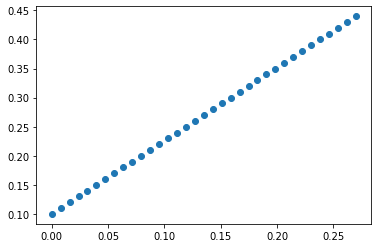

In [ ]:
from matplotlib import pyplot as plt
results_rf = np.array(results_rf)
print(results_rf[:, 0])
plt.scatter(results_rf[:,0], results_rf[:,1])
plt.show()

<img src="https://drive.google.com/uc?id=16VmljWbK7dQtyPZi5CW6k-K_0KWiqhkY">

* **The efficient frontier has become a straight line, tangent to the
frontier of the risky assets only.** 

* When the target is 10% the entire investment is allocated to the
risk-free asset, as the target increases the fraction of the risky assets grows proportionally to the volatility.


### The Sharpe Ratio
* The goal of an investor is to find the portfolio that generates the steepest possible line when combined with the risk-free investment. 
  * **The slope of this line is called the Sharpe ratio of the portfolio;**
  * steepest line means highest return assuming the same level of risk.

* The Sharpe ratio is defined as:

$$\mathcal{S} = (R_p - r_0 ) / \sigma_p $$
  * with $R_p$ portfolio expected return, $\sigma_p$ portfolio standard deviation in return (risk), and $r_0$ the return of the risk-free asset.

* Sharpe ratio measures how much additional return we achieved for the additional risk we took on, relative to putting all our money in a risk-free asset.

* Assume you want to achieve a certain level of return $R_\textrm{target}$ with your portfolio, what is the fraction $w_p$ of your wealth to place in the riscky part of the portfolio ?

$$ ( 1 - w_p ) * r_0 + w_p * R_p = R_\textrm{target}\\[5pt]$$

$$ w_p = \cfrac{( R_\textrm{target} – r_0)}{( R_p – r_0)}\\[5pt]$$

* The corresponding risk is

$$ w_p\cdot \sigma_p = \left[\cfrac{( R_\textrm{target} – r_0)}{(R_p – r_0)}\right]\cdot \sigma_p $$

* So if you want to minimize the portfolio risk you need to find:

$$ \min\left\{\left[\cfrac{(R_\textrm{target} – r_0)}{(R_p – r_0)}\right]\cdot \sigma_p\right\} = \min\left\{\cfrac{( R_\textrm{target} – r_0)}{\mathcal{S}}\right\}\\[5pt]$$

* But $R_\textrm{target}$ and $r_0$ are fixed so minimizing the above ratio is equivalent to maximize the Sharpe ratio:

$$ \min\left\{\cfrac{( R_\textrm{target} – r_0)}{\mathcal{S}}\right\} \implies\max\left\{\mathcal{S}\right\}\\[5pt]$$

* **The risky portfolio that maximizes the Sharpe ratio is the one that minimize the variance at the same time**.

In [ ]:
# Sharpe ratio optimization
num_assets = 5
rf_asset_return = 0.10

def negativeSharpeRatio(w, asset_returns, rf_asset_return, cov): 
    p_ret = asset_returns.dot(w)
    p_var = np.sqrt(w.T.dot(cov.dot(w)))
    ratio = -(p_ret - rf_asset_return) / p_var
    return ratio

constraints = ({'type': 'eq', 'fun': sum_weights})
bounds = tuple((0, 1) for asset in range(num_assets))
weights = [1./num_assets for _ in range(num_assets)]
opts = minimize(negativeSharpeRatio, weights, 
                args=(returns, rf_asset_return, covariance),
                bounds=bounds, constraints=constraints)
print (opts)

     fun: -1.2593178439364743
     jac: array([-0.37875985, -0.37936528, -0.26915939,  0.02855796, -0.37932482])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.19754313e-01, 5.43974197e-01, 1.43114687e-17, 7.67615138e-17,
       3.36271490e-01])


In [ ]:
print ("Sharpe ratio: ", -opts.fun)

Sharpe ratio:  1.2593178439364743


<img src="https://drive.google.com/uc?id=1vrNSG5_-ACIkF3DuKxZ6wQXnOsN0C9yz">

* **The optimization using the Sharpe ratio gives a portfolio that is
on the minimum volatility efficient frontier, and gives the maximum
return relative to putting all our money in the risk-free asset**.

## Portfolio Diversification

* A security total risk can be divided into:
  * **unsystematic**, the risk portion peculiar to the company that can be diversified away;
  * **systematic**, the non-diversifiable portion that is related to the
movement of the stock market and is therefore unavoidable.

* **Diversification** is a common topic in portfolio construction and allows to combine risky stocks so that the resulting portfolio is less risky than the sum of its components. 
  * Unfortunately, perfect negative relationship between the returns is very rare in real world;
  * however diversification will always reduce risk;
  * empirical studies have demonstrated that risk can be virtually eliminated in portfolios of 30 to 40 randomly selected stocks. 

* When using the standard variation of the portfolio return as a measure of the risk, as in the Markowitz model, it is easy to show how diversification allows to reduce the risk (assume an equally weighted portfolio):

$$\sigma_P = \sqrt{0.5\sigma_1^2 + 0.5\sigma_2^2 + 2 \cdot 0.5\sigma_1 \cdot 0.5\sigma_2\cdot\rho_{12}} \lt  0.5\sigma_1 + 0.5\sigma_2$$

* The inequality holds unless $\rho_{12} = 1$, so in general, **for risk, the whole is less than the sum of its parts**. 


## Capital Asset Pricing Model

* The Capital Asset Pricing Model (CAPM) describes the relationship between expected return of assets and **systematic risk** of the market.
  * No measure of unsystematic risk appears in the risk premium for in the world of CAPM diversification has already eliminated it.
  
* In such a model, it is assumed a linear relationship between the expected return of any security (or portfolio) and the expected return of the *market
portfolio*. It is given by

$$r_i = r_f + \beta_i(r_m-r_f)$$
where:
  * $r_i$ is the expected return of the $i^{th}$ security;
  * $r_f$ is the risk-free rate with zero standard deviation (e.g. Treasury Bills rates);
  * $r_m - r_f$ is the risk premium ($r_m$ denotes the market return including all securities in the market, e.g. an index like S\&P 500);
  * $\beta_i$ is a measure of $i^{th}$ asset volatility in relation to the overall market. 

* The relationship between risk and expected return is called the security market line (SML).
  * (Undervalued) No security can sell for long at prices low enough to yield more than its appropriate return on the SML; 
    * the security would then be very attractive compared with other securities of similar risk, and investors would bid its price up until its expected return fell to the appropriate position on the SML.
  * (Overvalued) Conversely, investors would sell off any stock selling at a price high enough to put its expected return below its appropriate position. 
    * The resulting reduction in price would continue until the stock’s expected return rose to the level justified by its systematic risk.

<img src="https://drive.google.com/uc?id=1jqdqKl1tkdyKS2D4hrPbaXRR4hDW-lF2">

* CAPM $\beta$ can be estimated with the measurement of the slope of the *regression line*, of the market vs individual stock return distribution.



### Linear Regression

* Given two sets of measurements $X$ and $y$ the linear regression determines the parameter $\alpha$ and $\beta$ such that

$$y=\beta X + \alpha$$

by minimizing the sum of the squared differences between the predicted and true $y$ values.

<img src="https://drive.google.com/uc?id=1gy8nApIAucDZB17TFDZ5gFkgfKtACYgJ">

* Notice that $X$ can be a vector of measurements, in that case it is a **multiple linear regression**, and $\beta$ will be a vector of coefficients each associated with a $X$ component.

### Example

* The Chinese Yuan (CNY) was pegged to the US Dollar (USD) prior to July 2005. 
* Then, China announced that the exchange rate would be set with reference to a basket of other currencies, allowing for a movement of up to 0.3% within any given day. 
  * **The actual currencies and their basket weights are unannounced by China.** 

<img src="https://drive.google.com/uc?id=1A-i4_xkPvAPrIrHTkYAy1aX4ZAHcRTC3">

* For evaluating the implicit exchange rate regime of the Yuan it is possible to regress the changes in the target currency on changes in the values of possible currencies in a reference basket.

* To apply this methodology the original dollar-based exchange rates have been converted using the Swiss Franc:
  * this allows currency moves of the dollar to be be used to explain moves
in the Yuan;
  * the choice of Swiss Franc is consistent with evaluations with respect to a stable currency. 

$$y_{\textrm{CNY}} = \alpha + \beta_{\textrm{USD}}x_{\textrm{USD}} + \beta_{\textrm{EUR}}x_{\textrm{EUR}} + \beta_{\textrm{GBP}}x_{\textrm{GBP}} + \ldots$$

* Input data stored in [exchange_rates.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/exchange_rates.csv)

In [ ]:
# load exchange rates

import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/exchange_rates.csv", index_col="DATE")
print (data.head())


            DEXCHUS  DEXJPUS  ...  log_ret_THB_SFR  log_ret_USD_SFR
DATE                          ...                                  
1999-01-04   8.2793   112.15  ...              NaN              NaN
1999-01-05   8.2795   111.15  ...        -0.002599        -0.002047
1999-01-06   8.2795   112.78  ...        -0.002666        -0.011472
1999-01-07   8.2798   111.69  ...        -0.006288        -0.000794
1999-01-08   8.2796   111.52  ...        -0.003565        -0.007689

[5 rows x 24 columns]


* Exchange rates have been collected from FRED website:
  * some simple manipulation have been done, e.g. filling missing values, computing logarithmic returns, etc...


In [ ]:
# perform regression prior to 2005-06-30
import statsmodels.api as sm

data.dropna(inplace=True)
X = data.loc[data.index < '2005 − 06 − 30',
           ['log_ret_YEN_SFR', 'log_ret_EUR_SFR', 'log_ret_GBP_SFR', 'log_ret_USD_SFR']]
y = data.loc[data.index < '2005 − 06 − 30' ,'log_ret_CNY_SFR']
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
print(est.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:        log_ret_CNY_SFR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.161e+06
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:15:39   Log-Likelihood:                 12651.
No. Observations:                1564   AIC:                        -2.529e+04
Df Residuals:                    1559   BIC:                        -2.526e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.202e-07   1.88e-06     

* From the detailed summary the most important information is:
  * **R-squared**: the closer to 1 the higher is the linear correlation between $y$ and $X$;
  * **coeff column**: the $\beta$ resulting from the regression, represent the mean change in the response variable $y$ for one unit of change in the predictor variable $X$;
  * **P>|t| column**: the p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor’s value are related to changes in
the response variable. Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

<img src="https://drive.google.com/uc?id=1FrKRa4fZtgUbwafnHctZVKKv25k2kRGv">

In [ ]:
# repeat regression for 2005-07-01 / 2005-12-31
X = data.loc[(data.index > '2005-07-01') & (data.index < '2005-12-31'),
           ['log_ret_YEN_SFR', 'log_ret_EUR_SFR', 'log_ret_GBP_SFR', 'log_ret_USD_SFR',
            'log_ret_WON_SFR', 'log_ret_MYR_SFR', 'log_ret_THB_SFR']]
y = data.loc[(data.index > '2005-07-01') & (data.index < '2005-12-31'),
           'log_ret_CNY_SFR']
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        log_ret_CNY_SFR   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     318.9
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           3.17e-75
Time:                        10:18:57   Log-Likelihood:                 666.03
No. Observations:                 130   AIC:                            -1316.
Df Residuals:                     122   BIC:                            -1293.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0001      0.000     

* Significant correlation with Malaysian Ringit and South Korean Won.

In [ ]:
# CNY annualized trend
import numpy as np

print ("CNY annualized trend: {:.4f}".format(np.exp(252*np.log1p(est.params[0])) - 1))

CNY annualized trend: -0.0297


### Regression in CAPM

* The regressed coefficient estimates can be expressed as

$$\beta \approx \cfrac{\textrm{cov}(X,y)}{\textrm {var}(X)}$$

* so provides insights about how *volatile*, or how risky, a stock is relative to the rest of the market.

* CAPM $\beta$ calculation helps investors understand whether a stock moves in the same direction as the rest of the market.
  * If $\beta= 1.0$ stock price is perfectly correlated with the market;
  * if $\beta < 1.0$ ("defensive"), the security is theoretically less volatile than the market (i.e. provides lower returns, so it is less risky);
  * if $\beta > 1.0$, ("aggressive"), the assets price is more volatile than the market.

* The point is to find stocks that have high $\beta$, and portfolios that have high $\alpha$. 
  * High $\beta$ values mean that the stock fares better than index;
  * $\alpha$ values above zero mean that your portfolio gives positive return no matter what the market does.

* Input data on [capm.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/capm.csv)

In [ ]:
!pip install yfinance


     |████████████████████████████████| 6.4 MB 20.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
proxy = yf.Tickers(['AAPL', 'AMZN', 'BA', 'GE', 'IBM', 'MGM','XOM', '^GSPC', 'CL=F', '^IRX'])
capm = proxy.history(start="2000-01-01", end="2014-01-01")
capm = capm['Close']

[*********************100%***********************]  10 of 10 completed


In [ ]:
capm.rename(columns={"^IRX": "rf", "CL=F":"Brent", "^GSPC":"SP500"}, inplace=True)
for c in ['AAPL', 'AMZN', 'BA', 'GE', 'IBM', 'MGM','XOM', 'SP500', 'Brent']:
  capm['ret_'+c] = capm[c].pct_change() - capm['rf']

capm.tail()
capm.to_csv("capm.csv")

In [ ]:
# load capm file
import pandas as pd

capm = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/capm.csv", 
                   index_col='Date')
print (capm.head())

                AAPL     AMZN         BA  Brent          GE        IBM  \
Date                                                                     
2000-01-03  0.855796  89.3750  25.940290    NaN  211.983627  66.433670   
2000-01-04  0.783644  81.9375  25.899933    NaN  203.504318  64.178673   
2000-01-05  0.795111  69.7500  27.513649    NaN  203.151001  66.433670   
2000-01-06  0.726304  65.5625  27.796041    NaN  205.867081  65.288269   
2000-01-07  0.760708  69.5625  28.602900    NaN  213.838486  65.001915   

                  MGM        XOM        SP500    rf  ret_AAPL  ret_AMZN  \
Date                                                                      
2000-01-03  11.097911  19.671467  1455.219971  5.27       NaN       NaN   
2000-01-04  10.995151  19.294683  1399.420044  5.27 -5.354310 -5.353217   
2000-01-05  10.818994  20.346542  1402.109985  5.27 -5.255367 -5.418741   
2000-01-06  11.215348  21.398417  1403.449951  5.24 -5.326538 -5.300036   
2000-01-07  11.097911  21.33561

<img src="https://drive.google.com/uc?id=1oUwaZTw-HlJ14QZ-nZ1jxxz3fSc1lwKo">

In [ ]:
# CAPM on ret_GE vs ret_SP500
import statsmodels.api as sm

capm = capm.dropna()

X = capm['ret_SP500']
y = capm['ret_GE']
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
print(est.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 ret_GE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.899e+07
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:40:07   Log-Likelihood:                 9601.5
No. Observations:                3340   AIC:                        -1.920e+04
Df Residuals:                    3338   BIC:                        -1.919e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.947e-05      0.000      0.151      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<img src="https://drive.google.com/uc?id=14DfI_dZV1nN3762OQn-fvBd22skTeX1i">

* The whole model is about plotting a line in a scatter plot: not a very complex model. 

* Assumptions under the model are even more simplistic:
  * expect that all investors are rational and they avoid risk;
  * everyone have full information about the market;
  * everyone have similar investment horizons and expectations about future movements;
  * stocks are all correctly priced.

* Moreover, this is a model from the 1950s; market dynamics were different back then. And of course, this is a retrospective model. We cannot know how future stock prices move and how the market behaves.

## Multifactor Models

* In its original formulation CAPM treats the market return as the only factor.

* Nevertheless a stock’s return can depend also on other macro-economic factors, such commodity prices, interest rates, economic growth (GDP).

$$r_i = \alpha + \beta_1 f_1 + \beta_2 f_2 + \beta_3 f_3 + \ldots$$

* Consider to improve the CAPM model by adding the **crude oil price** as a second factor. 

In [ ]:
# CAPM of ret_GE vs ret_SP500 and ret_CL=F
X = capm[['ret_SP500', 'ret_Brent']]
y = capm['ret_GE']
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_GE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.991e+07
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:45:38   Log-Likelihood:                 9625.6
No. Observations:                3340   AIC:                        -1.925e+04
Df Residuals:                    3337   BIC:                        -1.923e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.816e-05      0.000      0.179      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* The regression coefficient for the oil factor (ret_CL=F) is statistically significant and negative; 
  * over the analysis period, price changes in GE stock are negatively related to the price changes in oil. 
  
* Let’s apply the same model now to Exxon (XOM) stock.

In [ ]:
# CAPM of ret_XOM vs ret_SP500 and ret_CL=F
X = capm[['ret_SP500', 'ret_Brent']]
y = capm['ret_XOM']
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_XOM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.756e+07
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:45:49   Log-Likelihood:                 10401.
No. Observations:                3340   AIC:                        -2.080e+04
Df Residuals:                    3337   BIC:                        -2.078e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.905e-05      0.000     -0.190      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* The R-squared for XOM is slightly lower than for GE. 
  * Its relationship to the market index is less strong (lower t value). 
  * The regression coefficient for the oil factor (ret_Brent) is statistically significant and, unlike GE, positive.

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/pca.csv", index_col="Date")

equities = df.iloc[(df.index>'2020-01-01')&(df.index<'2020-07-15'), :-1]

#equities = (equities.loc[:, :] - equities.mean())/equities.std()
#print (equities.head())

cov = equities.cov()
eigVals, eigVecs = np.linalg.eig(cov)

#print (eigVals)
#print (eigVecs)
norm_eigVecs = eigVecs[:, 0]
print (norm_eigVecs)

# norm_eigVecs = abs(eigVecs.T[0])/sum(abs(eigVecs.T[0]))
# print (norm_eigVecs)
# market portfolio
pc_daily_ret = equities.dot(norm_eigVecs)
pc_cum_ret = pc_daily_ret.cumsum()

# worst portfolio
comps = []
for i in [24, 23, 16]:#range(3):
  worst_idx = [i]#[i for i in range(10)]# np.argsort(eigVecs.T[0])[:3] #24 23 16
  eq_worst = equities.iloc[:, worst_idx]
  worst_eigv = norm_eigVecs[worst_idx]
  worst_ret = np.cumsum(eq_worst.dot(worst_eigv))
  comps.append(worst_ret)
  #print ("Worst :", df.columns[worst_idx])

# best portfolio
best_idx = np.argsort(eigVecs.T[0])[:3]
print (best_idx)
eq_best = equities.iloc[:, best_idx]
best_eigv = norm_eigVecs[best_idx]
best_ret = eq_best.dot(best_eigv).cumsum()
print ("Best :", df.columns[best_idx])

[-0.35616738 -0.18785635 -0.16889097 -0.26404087 -0.25649256 -0.24312304
 -0.19966742 -0.18274445 -0.20077477 -0.11546529 -0.24880333 -0.14644028
 -0.18008744 -0.12153197 -0.17850286 -0.17945899 -0.11928527 -0.12214761
 -0.24176644 -0.2072541  -0.20415392 -0.19907622 -0.09441577 -0.14550551
 -0.0769017  -0.21290321]
[0 3 4]
Best : Index(['BA', 'CVX', 'DOW'], dtype='object')


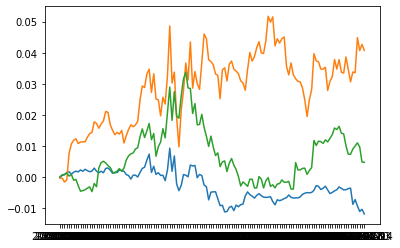

In [5]:
from matplotlib import pyplot as plt

#plt.plot(pc_cum_ret)
for c in comps:
  plt.plot(c)
#plt.plot(best_ret)
plt.show()

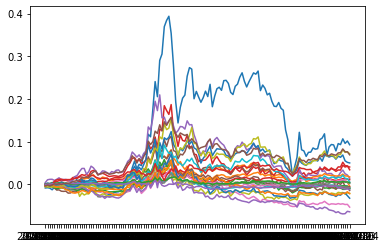

In [ ]:
from matplotlib import pyplot as plt

#plt.plot(pc_cum_ret)
for c in comps:
  plt.plot(c)
#plt.plot(best_ret)
plt.show()

In [ ]:
import numpy as np
equities = df.iloc[:, :-1]
cov = equities.cov()
eigVals, eigVecs = np.linalg.eig(cov)
indices = [i for i in reversed(np.argsort(eigVals))]
l = [eigVals[i]/np.sum(eigVals)*100 for i in reversed(np.argsort(eigVals))]

In [ ]:
print (indices)
print(eigVecs[indices[0]])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 22, 25, 24, 23, 21, 20, 19, 18, 17, 16]
[ 0.35852283  0.59321491  0.4437696   0.47583957  0.0070305  -0.05547448
 -0.16471566  0.05092449  0.05333839 -0.03260133  0.18202092  0.03557127
  0.00691838  0.03123379  0.01789778  0.11359728  0.02488687 -0.00712288
 -0.02726605 -0.01538611 -0.04076738  0.00134321  0.07116009 -0.03671191
 -0.03249354 -0.00412928]


In [ ]:
for i, index in enumerate(indices[0:3]):
  pc_daily_ret = equities.dot(eigVecs[index])
  pc_cum_ret = pc_daily_ret.cumsum()
  market_cum_ret = df['^DJI'].cumsum()

In [ ]:
A = [[-5, 2],[-7, 4]]
eigVecs = np.linalg.eig(A)[1]
print (eigVecs.T[0])

[-0.70710678 -0.70710678]
